In [3]:
import pandas as pd
import numpy as np

#### Pivot Table
The pivot table takes simple column-wise data as input, and groups the entries into a two-dimentional table that provides a multidimentional summarization of the data

In [4]:
tips =pd.DataFrame([
    [16.99,1.01,'Female','yes','Sun','Dinner',2],
    [30.34,1.66,'Male','yes','Sun','Dinner',3],
    [21.01,3.50,'Male','yes','Sun','Dinner',3],
    [23.68,3.31,'Male','yes','Sun','Dinner',2],
    [23.59,3.61,'Female','yes','Sun','Dinner',4],
    [16.99,2.21,'Female','No','thirsday','Dinner',2],
    [34.57,1.66,'Male','No','thirsday','Dinner',3],
    [21.01,2.21,'Male','yes','thirsday','Dinner',3],
    [34.57,3.31,'Male','No','friday','Dinner',2],
    [23.59,2.21,'Female','yes','friday','Dinner',4],
    [34.57,1.01,'Female','No','friday','Dinner',2],
    [30.34,2.21,'Male','No','friday','Dinner',3],
    [34.57,3.50,'Male','yes','saturday','Dinner',3],
    [23.68,2.21,'Male','No','saturday','Dinner',2],
    [34.57,3.61,'Female','yes','saturday','Dinner',4]
  
],
                   columns=['total_bill','tip','sex','smoker','day','time','size']
                   )

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,yes,Sun,Dinner,2
1,30.34,1.66,Male,yes,Sun,Dinner,3
2,21.01,3.50,Male,yes,Sun,Dinner,3
3,23.68,3.31,Male,yes,Sun,Dinner,2
4,23.59,3.61,Female,yes,Sun,Dinner,4
5,16.99,2.21,Female,No,thirsday,Dinner,2
6,34.57,1.66,Male,No,thirsday,Dinner,3
7,21.01,2.21,Male,yes,thirsday,Dinner,3
8,34.57,3.31,Male,No,friday,Dinner,2
9,23.59,2.21,Female,yes,friday,Dinner,4


In [5]:
# what is average total bill 
tips['total_bill'].mean()

26.938

In [6]:
# what is average total bill on the bases of gender
tips.groupby("sex")["total_bill"].mean()

sex
Female    25.050000
Male      28.196667
Name: total_bill, dtype: float64

In [7]:
# what is average total_bill on the bases of gender and smoker
tips.groupby(["sex","smoker"])["total_bill"].mean()

sex     smoker
Female  No        25.780
        yes       24.685
Male    No        30.790
        yes       26.122
Name: total_bill, dtype: float64

In [8]:
# what is average total_bill on the bases of gender and smoker
tips.groupby(["sex","smoker"])["total_bill"].mean().unstack()

smoker,No,yes
sex,,
Female,25.78,24.685
Male,30.79,26.122


In [10]:
# what is average total_bill on the bases of gender and smoker but using pivot table
tips.pivot_table(index='sex',columns='smoker',values="total_bill") # default aggrigate function is mean

smoker,No,yes
sex,,
Female,25.78,24.685
Male,30.79,26.122


In [14]:
# what is total total_bill on the bases of gender and smoker but using pivot table
tips.pivot_table(index="sex", columns="smoker", values='total_bill', aggfunc="sum")

smoker,No,yes
sex,,
Female,51.56,98.74
Male,123.16,130.61


In [16]:
tips.pivot_table(index="sex", columns="smoker", aggfunc="sum")

day                            size      \
smoker                            No                        yes   No yes   
sex                                                                        
Female                thirsdayfriday       SunSunfridaysaturday    4  14   
Male    thirsdayfridayfridaysaturday  SunSunSunthirsdaysaturday   10  14   

                            time                                   tip         \
smoker                        No                             yes    No    yes   
sex                                                                             
Female              DinnerDinner        DinnerDinnerDinnerDinner  3.22  10.44   
Male    DinnerDinnerDinnerDinner  DinnerDinnerDinnerDinnerDinner  9.39  14.18   

       total_bill          
smoker         No     yes  
sex                        
Female      51.56   98.74  
Male       123.16  130.61

In [17]:
# multidimentional 
tips.pivot_table(index=['sex','smoker'], columns=['day','time'],values="total_bill")

day              Sun  friday saturday thirsday
time          Dinner  Dinner   Dinner   Dinner
sex    smoker                                 
Female No        NaN  34.570      NaN    16.99
       yes     20.29  23.590    34.57      NaN
Male   No        NaN  32.455    23.68    34.57
       yes     25.01     NaN    34.57    21.01

In [18]:
tips.pivot_table(index=['sex','smoker'], columns=['day','time'],aggfunc=({'size':"mean","tip":"max","total_bill":"sum"}))

size                             tip                  \
day                 Sun friday saturday thirsday    Sun friday saturday   
time             Dinner Dinner   Dinner   Dinner Dinner Dinner   Dinner   
sex    smoker                                                             
Female No           NaN    2.0      NaN      2.0    NaN   1.01      NaN   
       yes     3.000000    4.0      4.0      NaN   3.61   2.21     3.61   
Male   No           NaN    2.5      2.0      3.0    NaN   3.31     2.21   
       yes     2.666667    NaN      3.0      3.0   3.50    NaN     3.50   

                       total_bill                           
day           thirsday        Sun friday saturday thirsday  
time            Dinner     Dinner Dinner   Dinner   Dinner  
sex    smoker                                               
Female No         2.21        NaN  34.57      NaN    16.99  
       yes         NaN      40.58  23.59    34.57      NaN  
Male   No         1.66        NaN  64.91    23.68    34.57  
       yes        2.21      75.03    NaN    34.57    21.01

In [20]:
# extract the toalt 
tips.pivot_table(index='sex',columns='smoker',values="total_bill",aggfunc="sum", margins=True)

smoker,No,yes,All
sex,,,
Female,51.56,98.74,150.30
Male,123.16,130.61,253.77
All,174.72,229.35,404.07


In [5]:
df = pd.read_csv("expense_data.csv")
df.head(3)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0


In [ ]:
# # want to print total amount_expenses of each catagory of each month

# -> there is no column of month

# we have need to extract month from Date column

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [6]:
#  Date is sting, we have need to convert into datatime
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [7]:
# now extract month name and add it as column in df

df["month"] = df["Date"].dt.month_name()

In [25]:
df.head(2)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March


In [26]:
df.pivot_table(index="Category", columns="month", values="INR", aggfunc="sum" )

month,December,February,January,March,November
Category,,,,,
Allowance,11000.00,NaN,1000.00,NaN,2000.0
Apparel,2590.00,798.00,NaN,NaN,NaN
Beauty,196.00,NaN,NaN,NaN,NaN
Education,NaN,NaN,1400.00,NaN,NaN
Food,6440.72,5579.85,9112.51,195.0,3174.4
Gift,NaN,NaN,NaN,NaN,115.0
Household,4800.00,2808.00,4580.00,NaN,NaN
Other,1790.00,20000.00,13178.00,900.0,2000.0
Petty cash,NaN,NaN,NaN,NaN,3.0


In [39]:

df.pivot_table(index="month", columns="Category", values="INR", aggfunc="sum")

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


<Axes: xlabel='month'>

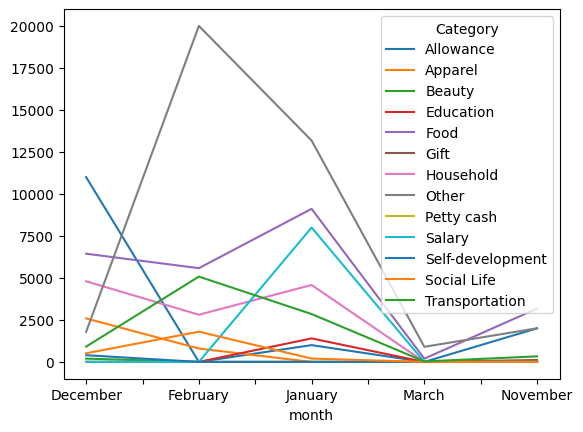

In [43]:
# plot graph
df.pivot_table(index="month", columns="Category", values="INR", aggfunc="sum",fill_value=0).plot()

<Axes: xlabel='month'>

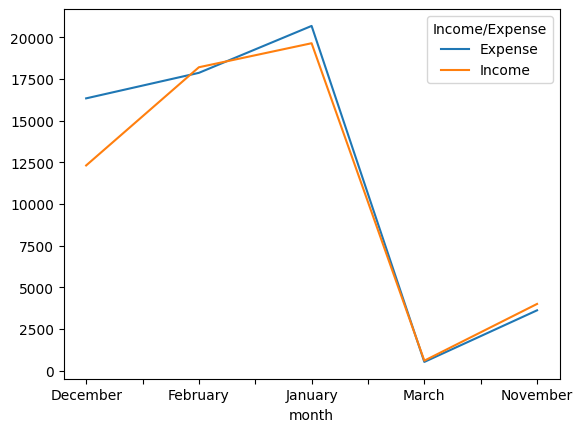

In [44]:
# plot on the bases of Income/Expense
df.pivot_table(index="month",columns="Income/Expense",values="INR",aggfunc="sum",fill_value=0).plot()

<Axes: xlabel='month'>

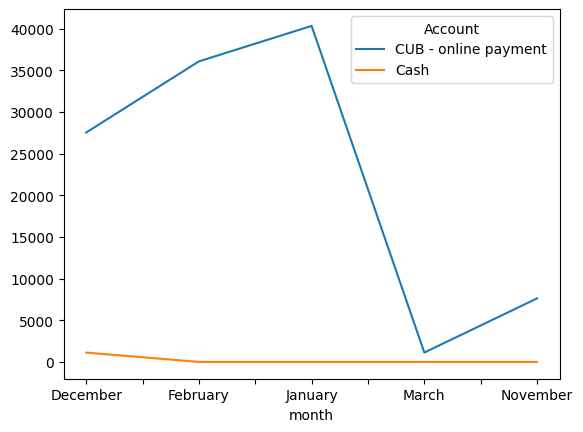

In [45]:
# plot on the bases of Account
df.pivot_table(index="month",columns="Account",values="INR",aggfunc="sum",fill_value=0).plot()

## vectorized string operations

In [ ]:
## what are the vectorized operations

a= np.array([1,2,3,4,5,6]) # this array is knwn vactor as it is 1D arary
a

array([1, 2, 3, 4, 5, 6])

In [ ]:
a*4  # each number of array will be multipled by 4... This is vactor operation

array([ 4,  8, 12, 16, 20, 24])

In [51]:
# problem in vectorized operaions in vanilla python
s = ["cat","mat","hgg","rat"] 

for i in s:
    print(i.startswith("c"))
    

True
False
False
False


In [ ]:
# problem in vectorized operaions in vanilla python
s = ["cat","mat",None,"rat"] 

for i in s:
    print(i.startswith("c"))  # it is not work on None or missing values

True
False


AttributeError: 'NoneType' object has no attribute 'startswith'

In [53]:
# how pandas solve this issue
s1 = pd.Series(["cat","mat",None,"rat"] )
s1

0     cat
1     mat
2    None
3     rat
dtype: object

In [57]:
# string accessor
s1.str

In [58]:

s1.str.startswith("c")

0     True
1    False
2     None
3    False
dtype: object

In [8]:
# iport titanic
titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
titanic["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

#### Common Functions

lower

In [ ]:

# print Names in lowercase

titanic["Name"].str.lower()


0                                braund, mr. owen harris
1      cumings, mrs. john bradley (florence briggs th...
2                                 heikkinen, miss. laina
3           futrelle, mrs. jacques heath (lily may peel)
4                               allen, mr. william henry
                             ...                        
886                                montvila, rev. juozas
887                         graham, miss. margaret edith
888             johnston, miss. catherine helen "carrie"
889                                behr, mr. karl howell
890                                  dooley, mr. patrick
Name: Name, Length: 891, dtype: object

##### upper 

In [ ]:

# print Names in upper case

titanic["Name"].str.upper()


0                                BRAUND, MR. OWEN HARRIS
1      CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                                 HEIKKINEN, MISS. LAINA
3           FUTRELLE, MRS. JACQUES HEATH (LILY MAY PEEL)
4                               ALLEN, MR. WILLIAM HENRY
                             ...                        
886                                MONTVILA, REV. JUOZAS
887                         GRAHAM, MISS. MARGARET EDITH
888             JOHNSTON, MISS. CATHERINE HELEN "CARRIE"
889                                BEHR, MR. KARL HOWELL
890                                  DOOLEY, MR. PATRICK
Name: Name, Length: 891, dtype: object

#### capitalize

In [ ]:
# print name in capitalize case

titanic["Name"].str.capitalize()


0                                Braund, mr. owen harris
1      Cumings, mrs. john bradley (florence briggs th...
2                                 Heikkinen, miss. laina
3           Futrelle, mrs. jacques heath (lily may peel)
4                               Allen, mr. william henry
                             ...                        
886                                Montvila, rev. juozas
887                         Graham, miss. margaret edith
888             Johnston, miss. catherine helen "carrie"
889                                Behr, mr. karl howell
890                                  Dooley, mr. patrick
Name: Name, Length: 891, dtype: object

#### title

In [70]:
# print all name in title case

titanic["Name"].str.title()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

#### len

In [84]:
# print the name of passenger who is longest

titanic["Name"].str.len()  # return total length of each name

0      23
1      51
2      22
3      44
4      24
       ..
886    21
887    28
888    40
889    21
890    19
Name: Name, Length: 891, dtype: int64

In [9]:
longest_length = titanic["Name"].str.len().max() #  return max length
longest_length


82

In [10]:
titanic["Name"].str.len() == longest_length

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Name, Length: 891, dtype: bool

In [11]:
titanic["Name"][titanic["Name"].str.len() == longest_length]

307    Penasco y Castellana, Mrs. Victor de Satode (M...
Name: Name, dtype: object

In [12]:
## this is the name of passanger who is longest 
titanic["Name"][titanic["Name"].str.len() == longest_length].values[0]

'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'

In [13]:
# print the name of passenger who is shortest

shortest_length = titanic["Name"].str.len().min() 
shortest_length

12

In [14]:

titanic["Name"][titanic["Name"].str.len()== shortest_length]

692    Lam, Mr. Ali
826    Lam, Mr. Len
Name: Name, dtype: object

#### strip

In [93]:
"            Nasir                "

'            Nasir                '

In [95]:
"            Nasir                ".strip()

'Nasir'

In [97]:
# clean all the name of passanger
titanic["Name"].str.strip()

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

##### split  and get

In [125]:
# create the columns of sir_name title_name and passenger_name
titanic["sir_name"] = titanic["Name"].str.split(",").str.get(0)

In [126]:
# title_name
titanic["title_name"] = titanic["Name"].str.split(",").str.get(1).str.strip().str.split(".").str.get(0)

In [127]:
# passenger_name
titanic["passenger_name"] = titanic["Name"].str.split(",").str.get(1).str.strip().str.split(".").str.get(1).str.strip()

In [128]:
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sir_name,title_name,passenger_name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)


##### replace

In [ ]:
titanic["title_name"].value_counts()
# here Miss  and Ms  are same


title_name
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [133]:
titanic["title_name"] = titanic["title_name"].str.replace("Ms","Miss")
titanic["title_name"] = titanic["title_name"].str.replace("Mlle","Miss")

In [134]:
titanic["title_name"].value_counts()

title_name
Mr              517
Miss            185
Mrs             125
Master           40
Dr                7
Rev               6
Major             2
Col               2
Don               1
Mme               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

##### filtering
startswith/endswith

isdigit/isalpha



In [ ]:
# extract all names of passangers that start with B
titanic["Name"][titanic["Name"].str.startswith("B")]


0                                Braund, Mr. Owen Harris
11                              Bonnell, Miss. Elizabeth
21                                 Beesley, Mr. Lawrence
74                                         Bing, Mr. Lee
85     Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...
                             ...                        
865                             Bystrom, Mrs. (Karolina)
870                                    Balkic, Mr. Cerin
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
883                        Banfield, Mr. Frederick James
889                                Behr, Mr. Karl Howell
Name: Name, Length: 72, dtype: object

In [145]:
# extract all names of passangers that start with b
titanic["Name"][titanic["Name"].str.lower().str.startswith("b")]

0                                Braund, Mr. Owen Harris
11                              Bonnell, Miss. Elizabeth
21                                 Beesley, Mr. Lawrence
74                                         Bing, Mr. Lee
85     Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...
                             ...                        
865                             Bystrom, Mrs. (Karolina)
870                                    Balkic, Mr. Cerin
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
883                        Banfield, Mr. Frederick James
889                                Behr, Mr. Karl Howell
Name: Name, Length: 72, dtype: object

In [ ]:
# extract all names of passangers that end with A
titanic["Name"][titanic["Name"].str.endswith("A")]

64     Stewart, Mr. Albert A
303      Keane, Miss. Nora A
Name: Name, dtype: object

In [155]:
# extract all names of passangers that end with a
titanic["Name"][titanic["Name"].str.lower().str.endswith("a")]

2                    Heikkinen, Miss. Laina
14     Vestrom, Miss. Hulda Amanda Adolfina
19                  Masselmani, Mrs. Fatima
24            Palsson, Miss. Torborg Danira
32                 Glynn, Miss. Mary Agatha
                       ...                 
816            Heininen, Miss. Wendla Maria
821                       Lulic, Mr. Nikola
835             Compton, Miss. Sara Rebecca
842                 Serepeca, Miss. Augusta
882            Dahlberg, Miss. Gerda Ulrika
Name: Name, Length: 71, dtype: object

In [164]:
# isgidit
# check wich name has digit

titanic[titanic["Name"].str.isdigit()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sir_name,title_name,passenger_name


In [165]:
# isalpha
# check which name has alpha characters

titanic[titanic["Name"].str.isalpha()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sir_name,title_name,passenger_name


#### applying regex



In [171]:
# extract name who contain jon --> both cases
titanic["Name"][titanic["Name"].str.contains('john', case=False)]

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
41     Turpin, Mrs. William John Robert (Dorothy Ann ...
45                              Rogers, Mr. William John
98                  Doling, Mrs. John T (Ada Julia Bone)
112                               Barton, Mr. David John
117                      Turpin, Mr. William John Robert
160                             Cribb, Mr. John Hatfield
162                           Bengtsson, Mr. John Viktor
165      Goldsmith, Master. Frank John William "Frankie"
168                                  Baumann, Mr. John D
172                         Johnson, Miss. Eleanor Ileen
188                                     Bourke, Mr. John
212                               Perkin, Mr. John Henry
226                            Mellors, Mr. William John
227                      Lovell, Mr. John Hall ("Henry")
302                      Johnson, Mr. William Cahoone Jr
324                            

In [176]:
## extract the all name whose start and with wovel--> a,e,i,o,u

titanic["sir_name"][titanic["sir_name"].str.contains('^[aeiouAEIOU].+[aeiouAEIOU]$')]

30          Uruchurtu
49     Arnold-Franchi
207          Albimona
210               Ali
353    Arnold-Franchi
493      Artagaveytia
518             Angle
784               Ali
840          Alhomaki
Name: sir_name, dtype: object

In [ ]:
## extract the all name whose start and with consonent

titanic["sir_name"][titanic["sir_name"].str.contains('^[^aeiouAEIOU].+[^aeiouAEIOU]$')]

0         Braund
1        Cumings
2      Heikkinen
5          Moran
6       McCarthy
         ...    
884     Sutehall
887       Graham
888     Johnston
889         Behr
890       Dooley
Name: sir_name, Length: 671, dtype: object

##### slicing

In [ ]:
titanic["Name"].str[:] # get all char

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [179]:
titanic["Name"].str[:4] # get first 4 char

0      Brau
1      Cumi
2      Heik
3      Futr
4      Alle
       ... 
886    Mont
887    Grah
888    John
889    Behr
890    Dool
Name: Name, Length: 891, dtype: object

In [180]:
titanic["Name"].str[::2] # get alyernate char

0                    Ban,M.Oe ars
1      Cmns r.Jh rde Foec rgsTae)
2                     Hiknn is an
3          Ftel,Ms aqe et Ll a el
4                    Aln r ila er
                  ...            
886                   Mnvl,Rv uzs
887                Gaa,Ms.Mrae dt
888          Jhso,Ms.CteieHln"are
889                   Bh,M.Kr oel
890                    Doe,M.Ptik
Name: Name, Length: 891, dtype: object

In [181]:
titanic["Name"].str[::-1] # get all char in reverse order

0                                sirraH newO .rM ,dnuarB
1      )reyahT sggirB ecnerolF( yeldarB nhoJ .srM ,sg...
2                                 aniaL .ssiM ,nenikkieH
3           )leeP yaM yliL( htaeH seuqcaJ .srM ,ellertuF
4                               yrneH mailliW .rM ,nellA
                             ...                        
886                                sazouJ .veR ,alivtnoM
887                         htidE teragraM .ssiM ,maharG
888             "eirraC" neleH enirehtaC .ssiM ,notsnhoJ
889                                llewoH lraK .rM ,rheB
890                                  kcirtaP .rM ,yelooD
Name: Name, Length: 891, dtype: object

# Date and Time 

#### Timestamp Objects

Time stamps reference particular moments in time( e.g Oct 24th, 2022 at 7:00pm) 

#### Creating Timestamp Objects

In [182]:
# creating a timestamp
pd.Timestamp('2024/11/8') # -> YY-MM-DD

Timestamp('2024-11-08 00:00:00')

In [ ]:
# variations
pd.Timestamp('2024-11-8') # -> YY-MM-DD
pd.Timestamp('2024, 11, 8') # -> with spaces

Timestamp('2024-11-08 00:00:00')

In [185]:
# only year

pd.Timestamp('2024')

Timestamp('2024-01-01 00:00:00')

In [186]:
# using text

pd.Timestamp('8th November,2024')

Timestamp('2024-11-08 00:00:00')

In [192]:
# using time

pd.Timestamp('8th November 2024 9:30pm')

Timestamp('2024-11-08 21:30:00')

In [196]:
# using datetime.datetime object from python

import datetime 

timestamp = datetime.datetime(2024,11,8,3,34,20)

x = pd.Timestamp(timestamp)
x

Timestamp('2024-11-08 03:34:20')

In [ ]:
# fetch attributes from timestamp
x.year
x.month
x.day
x.hour
x.minute
x.second

20

#### DatetimeIndex Object

A collection of pandas timestamp

In [210]:
datetime = pd.DatetimeIndex(['2024/11/8' ,'2023/11/9', '2022/11/10'])
datetime

DatetimeIndex(['2024-11-08', '2023-11-09', '2022-11-10'], dtype='datetime64[ns]', freq=None)

In [211]:
type(datetime)

pandas.core.indexes.datetimes.DatetimeIndex

In [212]:
datetime[0]

Timestamp('2024-11-08 00:00:00')

In [213]:
# using python datetime object

import datetime as dt

pd.DatetimeIndex([dt.datetime(2023,1,1),dt.datetime(2022,11,8), dt.datetime(2024,11,8)])

DatetimeIndex(['2023-01-01', '2022-11-08', '2024-11-08'], dtype='datetime64[ns]', freq=None)

In [215]:
# using timestamp
dt_index = pd.DatetimeIndex([pd.Timestamp(2023,1,1),pd.Timestamp(2022,11,8), pd.Timestamp(2024,11,8)])
dt_index

DatetimeIndex(['2023-01-01', '2022-11-08', '2024-11-08'], dtype='datetime64[ns]', freq=None)

In [216]:
# using datetimeIndex as series index 
pd.Series([1,2,3], index=dt_index)

2023-01-01    1
2022-11-08    2
2024-11-08    3
dtype: int64

#### date_range function

In [218]:
# generate daily dates in a given range
pd.date_range(start='2024/11/8', end='2024/11/30', freq="D")

DatetimeIndex(['2024-11-08', '2024-11-09', '2024-11-10', '2024-11-11',
               '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15',
               '2024-11-16', '2024-11-17', '2024-11-18', '2024-11-19',
               '2024-11-20', '2024-11-21', '2024-11-22', '2024-11-23',
               '2024-11-24', '2024-11-25', '2024-11-26', '2024-11-27',
               '2024-11-28', '2024-11-29', '2024-11-30'],
              dtype='datetime64[ns]', freq='D')

In [219]:
# alternates dates in a given range
pd.date_range(start='2024/11/8', end='2024/11/30', freq="2D")

DatetimeIndex(['2024-11-08', '2024-11-10', '2024-11-12', '2024-11-14',
               '2024-11-16', '2024-11-18', '2024-11-20', '2024-11-22',
               '2024-11-24', '2024-11-26', '2024-11-28', '2024-11-30'],
              dtype='datetime64[ns]', freq='2D')

In [220]:
# dates in a given range after 3 days
pd.date_range(start='2024/11/8', end='2024/11/30', freq="3D")

DatetimeIndex(['2024-11-08', '2024-11-11', '2024-11-14', '2024-11-17',
               '2024-11-20', '2024-11-23', '2024-11-26', '2024-11-29'],
              dtype='datetime64[ns]', freq='3D')

In [ ]:
# B -> busines days in a given range
pd.date_range(start='2024/11/8', end='2024/11/30', freq="B")


DatetimeIndex(['2024-11-08', '2024-11-11', '2024-11-12', '2024-11-13',
               '2024-11-14', '2024-11-15', '2024-11-18', '2024-11-19',
               '2024-11-20', '2024-11-21', '2024-11-22', '2024-11-25',
               '2024-11-26', '2024-11-27', '2024-11-28', '2024-11-29'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
# W -> 1 week per day in a given range
pd.date_range(start='2024/11/8', end='2024/11/30', freq="W") # defalt saturdat

DatetimeIndex(['2024-11-10', '2024-11-17', '2024-11-24'], dtype='datetime64[ns]', freq='W-SUN')

In [227]:
# W -> 1 week per day in a given range
pd.date_range(start='2024/11/8', end='2024/11/30', freq="W-MON") # return  Monday

DatetimeIndex(['2024-11-11', '2024-11-18', '2024-11-25'], dtype='datetime64[ns]', freq='W-MON')

In [228]:
# W -> 1 week per day in a given range
pd.date_range(start='2024/11/8', end='2024/11/30', freq="W-FRI") # return Fridat

DatetimeIndex(['2024-11-08', '2024-11-15', '2024-11-22', '2024-11-29'], dtype='datetime64[ns]', freq='W-FRI')

In [ ]:
#H -> Hourly date(factor)
pd.date_range(start='2024/11/8', end='2024/11/30', freq="H") # return date after every hours

C:\Users\Nasir\AppData\Local\Temp\ipykernel_9968\2396425703.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2024/11/8', end='2024/11/30', freq="H")


DatetimeIndex(['2024-11-08 00:00:00', '2024-11-08 01:00:00',
               '2024-11-08 02:00:00', '2024-11-08 03:00:00',
               '2024-11-08 04:00:00', '2024-11-08 05:00:00',
               '2024-11-08 06:00:00', '2024-11-08 07:00:00',
               '2024-11-08 08:00:00', '2024-11-08 09:00:00',
               ...
               '2024-11-29 15:00:00', '2024-11-29 16:00:00',
               '2024-11-29 17:00:00', '2024-11-29 18:00:00',
               '2024-11-29 19:00:00', '2024-11-29 20:00:00',
               '2024-11-29 21:00:00', '2024-11-29 22:00:00',
               '2024-11-29 23:00:00', '2024-11-30 00:00:00'],
              dtype='datetime64[ns]', length=529, freq='h')

In [230]:
#H -> Hourly date(factor)
pd.date_range(start='2024/11/8', end='2024/11/30', freq="6H") # return date after every 6 hours

C:\Users\Nasir\AppData\Local\Temp\ipykernel_9968\3428220948.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  pd.date_range(start='2024/11/8', end='2024/11/30', freq="6H") # return date after every 6 hours


DatetimeIndex(['2024-11-08 00:00:00', '2024-11-08 06:00:00',
               '2024-11-08 12:00:00', '2024-11-08 18:00:00',
               '2024-11-09 00:00:00', '2024-11-09 06:00:00',
               '2024-11-09 12:00:00', '2024-11-09 18:00:00',
               '2024-11-10 00:00:00', '2024-11-10 06:00:00',
               '2024-11-10 12:00:00', '2024-11-10 18:00:00',
               '2024-11-11 00:00:00', '2024-11-11 06:00:00',
               '2024-11-11 12:00:00', '2024-11-11 18:00:00',
               '2024-11-12 00:00:00', '2024-11-12 06:00:00',
               '2024-11-12 12:00:00', '2024-11-12 18:00:00',
               '2024-11-13 00:00:00', '2024-11-13 06:00:00',
               '2024-11-13 12:00:00', '2024-11-13 18:00:00',
               '2024-11-14 00:00:00', '2024-11-14 06:00:00',
               '2024-11-14 12:00:00', '2024-11-14 18:00:00',
               '2024-11-15 00:00:00', '2024-11-15 06:00:00',
               '2024-11-15 12:00:00', '2024-11-15 18:00:00',
               '2024-11-

In [232]:
# M -> Month end
pd.date_range(start='2024/11/8', end='2025/11/30', freq="M") 

C:\Users\Nasir\AppData\Local\Temp\ipykernel_9968\1750099106.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pd.date_range(start='2024/11/8', end='2025/11/30', freq="M")


DatetimeIndex(['2024-11-30', '2024-12-31', '2025-01-31', '2025-02-28',
               '2025-03-31', '2025-04-30', '2025-05-31', '2025-06-30',
               '2025-07-31', '2025-08-31', '2025-09-30', '2025-10-31',
               '2025-11-30'],
              dtype='datetime64[ns]', freq='ME')

In [233]:
# MS -> Month start
pd.date_range(start='2024/11/8', end='2025/11/30', freq="MS") 

DatetimeIndex(['2024-12-01', '2025-01-01', '2025-02-01', '2025-03-01',
               '2025-04-01', '2025-05-01', '2025-06-01', '2025-07-01',
               '2025-08-01', '2025-09-01', '2025-10-01', '2025-11-01'],
              dtype='datetime64[ns]', freq='MS')

In [236]:
# A -> Year end
pd.date_range(start='2024/11/8', end='2030/11/30', freq="A") 

C:\Users\Nasir\AppData\Local\Temp\ipykernel_9968\1596287726.py:2: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  pd.date_range(start='2024/11/8', end='2030/11/30', freq="A")


DatetimeIndex(['2024-12-31', '2025-12-31', '2026-12-31', '2027-12-31',
               '2028-12-31', '2029-12-31'],
              dtype='datetime64[ns]', freq='YE-DEC')

In [237]:
# AS -> Year start
pd.date_range(start='2024/11/8', end='2030/11/30', freq="AS") 

C:\Users\Nasir\AppData\Local\Temp\ipykernel_9968\1434478235.py:2: FutureWarning: 'AS' is deprecated and will be removed in a future version, please use 'YS' instead.
  pd.date_range(start='2024/11/8', end='2030/11/30', freq="AS")


DatetimeIndex(['2025-01-01', '2026-01-01', '2027-01-01', '2028-01-01',
               '2029-01-01', '2030-01-01'],
              dtype='datetime64[ns]', freq='YS-JAN')

In [238]:
# using period number of result
pd.date_range(start='2024/11/8', periods=25, freq="D") 


DatetimeIndex(['2024-11-08', '2024-11-09', '2024-11-10', '2024-11-11',
               '2024-11-12', '2024-11-13', '2024-11-14', '2024-11-15',
               '2024-11-16', '2024-11-17', '2024-11-18', '2024-11-19',
               '2024-11-20', '2024-11-21', '2024-11-22', '2024-11-23',
               '2024-11-24', '2024-11-25', '2024-11-26', '2024-11-27',
               '2024-11-28', '2024-11-29', '2024-11-30', '2024-12-01',
               '2024-12-02'],
              dtype='datetime64[ns]', freq='D')

#### to_datetime function 

convert an existing objects to pandas timesamp/datetimeIndex object

In [250]:
s = pd.Series(['2023/8/11', '2022/9/12', '2021/10/13']) # this is string 
s

0     2023/8/11
1     2022/9/12
2    2021/10/13
dtype: object

In [251]:
# conver the series inro datetime
pd.to_datetime(s)

0   2023-08-11
1   2022-09-12
2   2021-10-13
dtype: datetime64[ns]

In [252]:
pd.to_datetime(s).dt.year
pd.to_datetime(s).dt.month
pd.to_datetime(s).dt.day

0    11
1    12
2    13
dtype: int32

In [258]:
pd.to_datetime(s).dt.year
# pd.to_datetime(s).dt.month_name()
# pd.to_datetime(s).dt.day_name()

0    2023
1    2022
2    2021
dtype: int32

In [259]:
# with error
s = pd.Series(['2023/8/11', '2022/9/12', '2021/103/13']) # this is string 
pd.to_datetime(s)


ValueError: time data "2021/103/13" doesn't match format "%Y/%m/%d", at position 2. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [261]:
# with error
s = pd.Series(['2023/8/11', '2022/9/12', '2021/103/13']) # this is string 
pd.to_datetime(s, errors='coerce') # it return NaT(not a time) on the wrong date formate


0   2023-08-11
1   2022-09-12
2          NaT
dtype: datetime64[ns]

In [15]:
df = pd.read_csv("expense_data.csv")
df

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
0,3/2/2022 10:11,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0
1,3/2/2022 10:11,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0
2,3/1/2022 19:50,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0
3,3/1/2022 18:56,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0
4,3/1/2022 18:22,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0
...,...,...,...,...,...,...,...,...,...,...,...
272,11/22/2021 14:16,CUB - online payment,Food,NaN,Dinner,90.0,Expense,NaN,90.0,INR,90.0
273,11/22/2021 14:16,CUB - online payment,Food,NaN,Lunch with company,97.0,Expense,NaN,97.0,INR,97.0
274,11/21/2021 17:07,CUB - online payment,Transportation,NaN,Rapido,130.0,Expense,NaN,130.0,INR,130.0
275,11/21/2021 15:50,CUB - online payment,Food,NaN,Lunch,875.0,Expense,NaN,875.0,INR,875.0


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [271]:
# convert the object(string) into datetime
pd.to_datetime(df["Date"])



0     2022-03-02 10:11:00
1     2022-03-02 10:11:00
2     2022-03-01 19:50:00
3     2022-03-01 18:56:00
4     2022-03-01 18:22:00
              ...        
272   2021-11-22 14:16:00
273   2021-11-22 14:16:00
274   2021-11-21 17:07:00
275   2021-11-21 15:50:00
276   2021-11-21 13:30:00
Name: Date, Length: 277, dtype: datetime64[ns]

In [ ]:
df["Date"] = pd.to_datetime(df["Date"]) # reassign

In [273]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


##### dt accessor

Accessor object for datetimelike properties of the Series values

In [275]:
df["Date"].dt.year

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
272    2021
273    2021
274    2021
275    2021
276    2021
Name: Date, Length: 277, dtype: int32

In [277]:
df["Date"].dt.month_name()

0         March
1         March
2         March
3         March
4         March
         ...   
272    November
273    November
274    November
275    November
276    November
Name: Date, Length: 277, dtype: object

In [278]:
df["Date"].dt.day_name()

0      Wednesday
1      Wednesday
2        Tuesday
3        Tuesday
4        Tuesday
         ...    
272       Monday
273       Monday
274       Sunday
275       Sunday
276       Sunday
Name: Date, Length: 277, dtype: object

In [280]:
df["Date"].dt.is_leap_year

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

In [283]:
df["Date"].dt.is_month_end
df["Date"].dt.is_month_start
df["Date"].dt.is_quarter_end
df["Date"].dt.is_quarter_start
df["Date"].dt.is_year_end
df["Date"].dt.is_year_start

0      False
1      False
2      False
3      False
4      False
       ...  
272    False
273    False
274    False
275    False
276    False
Name: Date, Length: 277, dtype: bool

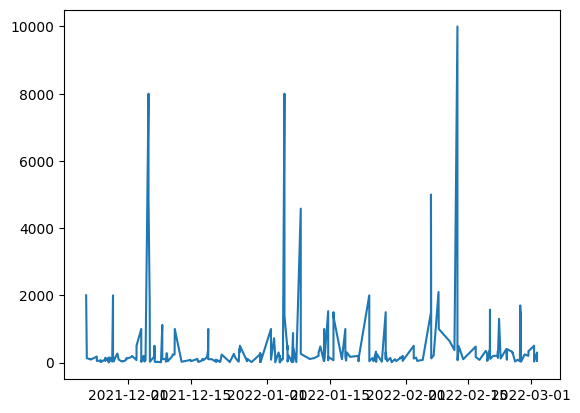

In [ ]:
# plot graph
import matplotlib.pyplot as plt
# plt.plot(x_axis, y_axis])

plt.plot(df['Date'], df['INR'])

In [290]:
# day names wise chart/month wise bar chart
df["day_name"] = df["Date"].dt.day_name()
df["month_name"] = df["Date"].dt.month_name()
df.head(2)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,Wednesday,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,Wednesday,March


<Axes: xlabel='day_name'>

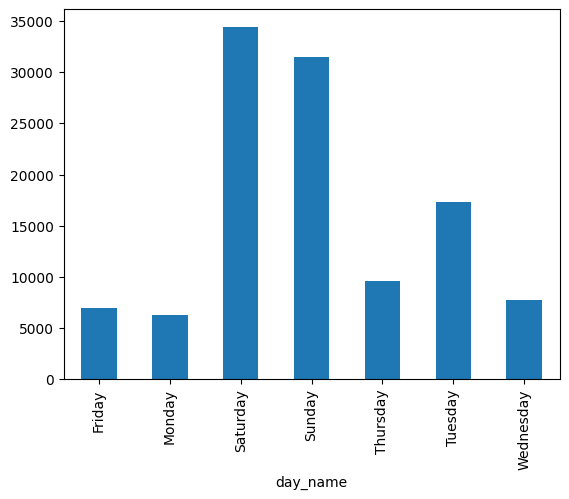

In [294]:
df.groupby('day_name')["INR"].sum().plot(kind="bar")

<Axes: xlabel='month_name'>

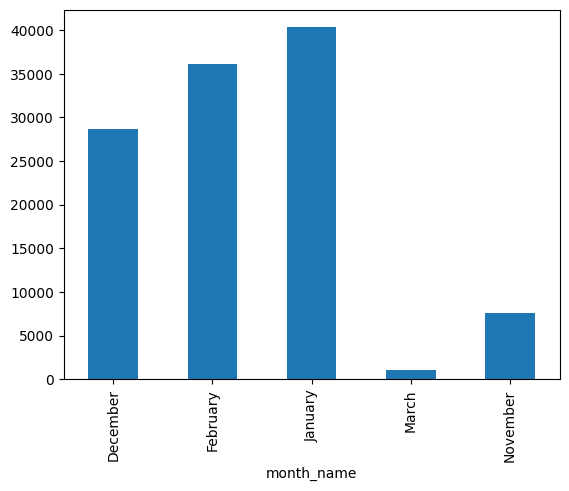

In [295]:
df.groupby('month_name')["INR"].sum().plot(kind="bar")

In [299]:
# calculate the expensive on end of the month

df[df['Date'].dt.is_month_end]

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,day_name,month_name
7,2022-02-28 11:56:00,CUB - online payment,Food,NaN,Pizza,339.15,Expense,NaN,339.15,INR,339.15,Monday,February
8,2022-02-28 11:45:00,CUB - online payment,Other,NaN,From kumara,200.00,Income,NaN,200.00,INR,200.00,Monday,February
61,2022-01-31 08:44:00,CUB - online payment,Transportation,NaN,Vnr to apk,50.00,Expense,NaN,50.00,INR,50.00,Monday,January
62,2022-01-31 08:27:00,CUB - online payment,Other,NaN,To vicky,200.00,Expense,NaN,200.00,INR,200.00,Monday,January
63,2022-01-31 08:26:00,CUB - online payment,Transportation,NaN,To ksr station,153.00,Expense,NaN,153.00,INR,153.00,Monday,January
242,2021-11-30 14:24:00,CUB - online payment,Gift,NaN,Bharath birthday,115.00,Expense,NaN,115.00,INR,115.00,Tuesday,November
243,2021-11-30 14:17:00,CUB - online payment,Food,NaN,Lunch with company,128.00,Expense,NaN,128.00,INR,128.00,Tuesday,November
244,2021-11-30 10:11:00,CUB - online payment,Food,NaN,Breakfast,70.00,Expense,NaN,70.00,INR,70.00,Tuesday,November


<Axes: xlabel='month_name'>

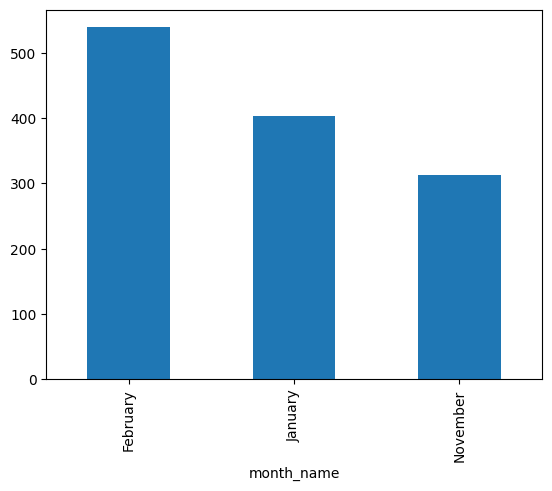

In [298]:
# calculate the expensive on end of the month

df[df['Date'].dt.is_month_end].groupby('month_name')["INR"].sum().plot(kind="bar")